In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv('Autism_Data.arff')
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [ ]:
df.rename(columns={'austim': 'relative_autism'}, inplace=True)
df.rename(columns={'Class/ASD': 'Autistic'}, inplace=True)

In [ ]:
df.shape

(704, 21)

In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [ ]:
print(df['gender'].value_counts())
print("------------------------------")
print(df['ethnicity'].value_counts())
print("------------------------------")
print(df['jundice'].value_counts())
print("------------------------------")
print(df['relative_autism'].value_counts())
print("------------------------------")
print(df['used_app_before'].value_counts())
print("------------------------------")
print(df['result'].value_counts())
print("------------------------------")
print(df['age_desc'].value_counts())
print("------------------------------")
print(df['relation'].value_counts())
print("------------------------------")
print(df['Autistic'].value_counts())
print("------------------------------")

m    367
f    337
Name: gender, dtype: int64
------------------------------
White-European       233
Asian                123
?                     95
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64
------------------------------
no     635
yes     69
Name: jundice, dtype: int64
------------------------------
no     613
yes     91
Name: relative_autism, dtype: int64
------------------------------
no     692
yes     12
Name: used_app_before, dtype: int64
------------------------------
4     131
3     110
5      83
2      74
6      70
7      57
8      55
9      47
1      33
10     30
0      14
Name: result, dtype: int64
------------------------------
'18 and more'    704
Name: age_desc, dtype: int64
------------------------------
Self                          522
?                    

In [ ]:
df.drop("age_desc", axis=1, inplace=True)

In [ ]:
df['gender'].replace({'m': 1, 'f': 0}, inplace=True)
df['jundice'].replace({'yes': 1, 'no': 0}, inplace=True)
df['relative_autism'].replace({'yes': 1, 'no': 0}, inplace=True)
df['used_app_before'].replace({'yes': 1, 'no': 0}, inplace=True)
df['Autistic'].replace({'YES': 1, 'NO': 0}, inplace=True)
df['ethnicity'].replace(['others', '?', 'Others'], 'Others', inplace=True)
df['relation'].replace({'?': 'Others'}, inplace=True)

In [ ]:
question_mark_count = (df == "?").sum()
question_mark_count

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
relative_autism    0
contry_of_res      0
used_app_before    0
result             0
relation           0
Autistic           0
dtype: int64

In [ ]:
df['age'].replace('?', np.nan, inplace=True)
df['age']=df['age'].apply(lambda x:float(x))
df['age'].fillna(df['age'].median(), inplace=True)

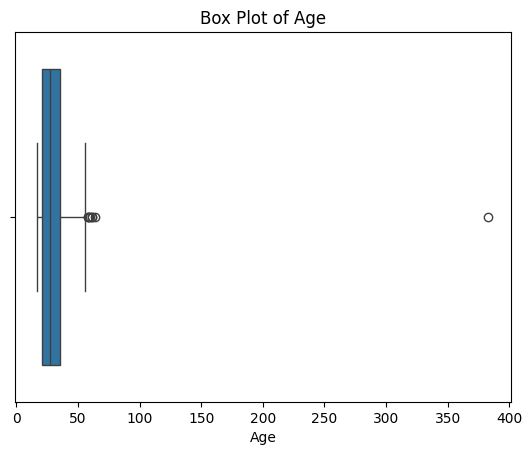

In [ ]:
sns.boxplot(x=df['age'])

plt.xlabel("Age")
plt.title("Box Plot of Age")

plt.show()

In [ ]:
#Replacing max age with Null
max_age = df['age'].max()
df['age'].replace(max_age, df['age'].median(), inplace=True)

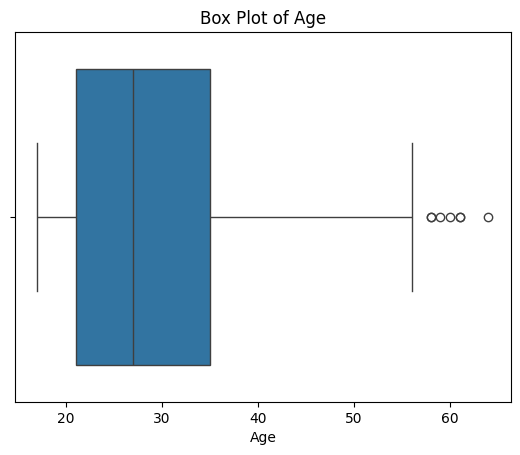

In [ ]:
sns.boxplot(x=df['age'])

plt.xlabel("Age")
plt.title("Box Plot of Age")

plt.show()

In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,relative_autism,used_app_before,result,Autistic
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.184659,0.521307,0.098011,0.129261,0.017045,4.875000,0.268466
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,9.691837,0.499901,0.297541,0.335728,0.129533,2.501493,0.443476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


In [ ]:
df['relative_autism'].value_counts()

0    613
1     91
Name: relative_autism, dtype: int64

In [ ]:
null_values_table = df.isnull().sum()
null_values_table

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
relative_autism    0
contry_of_res      0
used_app_before    0
result             0
relation           0
Autistic           0
dtype: int64

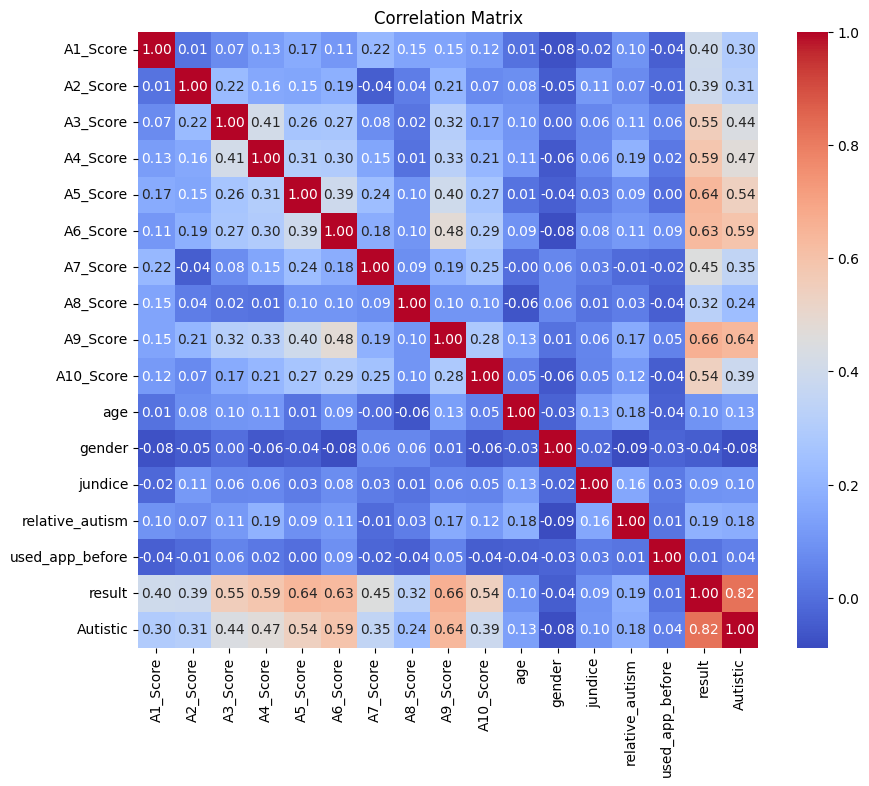

In [ ]:
correlation_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Set the title
plt.title("Correlation Matrix")

# Show the plot
plt.show()

In [ ]:
# result is a total of a1_score + .. + a10_score, we already have that information so we will drop the result column. Also look at high correlation
df.drop(['result'], axis=1, inplace=True)

In [ ]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,relative_autism,contry_of_res,used_app_before,relation,Autistic
0,1,1,1,1,0,0,1,1,0,0,26.0,0,White-European,0,0,'United States',0,Self,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,Latino,0,1,Brazil,0,Self,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,Latino,1,1,Spain,0,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,White-European,0,1,'United States',0,Self,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,Others,0,0,Egypt,0,Others,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,White-European,0,0,Russia,0,Self,1
700,1,0,0,0,0,0,0,1,0,1,34.0,1,Hispanic,0,0,Mexico,0,Parent,0
701,1,0,1,1,1,0,1,1,0,1,24.0,0,Others,0,0,Russia,0,Others,1
702,1,0,0,1,1,0,1,0,1,1,35.0,1,'South Asian',0,0,Pakistan,0,Self,0


In [ ]:
# Remove single quotes from the country names
df['contry_of_res'] = df['contry_of_res'].str.replace("'", "")

# Verify the changes
print(df['contry_of_res'].value_counts())

United States           113
United Arab Emirates     82
New Zealand              81
India                    81
United Kingdom           77
                       ... 
China                     1
Chile                     1
Lebanon                   1
Burundi                   1
Cyprus                    1
Name: contry_of_res, Length: 67, dtype: int64


In [ ]:
# Calculate value counts of contry_of_res
country_counts = df['contry_of_res'].value_counts()

# Identify countries with counts less than 50
other_countries = country_counts[country_counts < 20].index

# Replace countries with counts less than 50 with 'Other'
df['contry_of_res'] = df['contry_of_res'].replace(other_countries, 'Other')

# Verify the changes
print(df['contry_of_res'].value_counts())

Other                   196
United States           113
United Arab Emirates     82
New Zealand              81
India                    81
United Kingdom           77
Jordan                   47
Australia                27
Name: contry_of_res, dtype: int64


In [ ]:
#Rename ethnicity
df['ethnicity'] = df['ethnicity'].replace({"'Middle Eastern '": "Middle Eastern", "'South Asian'": "South Asian"})
print("Value counts in ethnicity")
print(df["ethnicity"].value_counts())

Value counts in ethnicity
White-European    233
Others            126
Asian             123
Middle Eastern     92
Black              43
South Asian        36
Latino             20
Hispanic           13
Pasifika           12
Turkish             6
Name: ethnicity, dtype: int64


In [ ]:
#Combine Health care professional with Others
df['relation'] = df['relation'].replace({"'Health care professional'": "Others"})
print("Value counts in relation")
print(df["relation"].value_counts())

Value counts in relation
Self        522
Others      104
Parent       50
Relative     28
Name: relation, dtype: int64


In [ ]:
df = pd.get_dummies(data=df, columns = ['ethnicity', 'contry_of_res', 'relation'], drop_first=True)

In [ ]:
print("DataFrame Columns:")
for i in range(0, len(df.columns), 4):
    print(", ".join(df.columns[i:i+4]))
    df.corr().style.background_gradient(cmap='RdBu_r', axis=None)
df.drop(['Autistic'], axis=1).corr().style.background_gradient(cmap='coolwarm', axis=None)

DataFrame Columns:
A1_Score, A2_Score, A3_Score, A4_Score
A5_Score, A6_Score, A7_Score, A8_Score
A9_Score, A10_Score, age, gender
jundice, relative_autism, used_app_before, Autistic
ethnicity_Black, ethnicity_Hispanic, ethnicity_Latino, ethnicity_Middle Eastern
ethnicity_Others, ethnicity_Pasifika, ethnicity_South Asian, ethnicity_Turkish
ethnicity_White-European, contry_of_res_India, contry_of_res_Jordan, contry_of_res_New Zealand
contry_of_res_Other, contry_of_res_United Arab Emirates, contry_of_res_United Kingdom, contry_of_res_United States
relation_Parent, relation_Relative, relation_Self


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,relative_autism,used_app_before,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,ethnicity_White-European,contry_of_res_India,contry_of_res_Jordan,contry_of_res_New Zealand,contry_of_res_Other,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,relation_Parent,relation_Relative,relation_Self
A1_Score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.007917,-0.075011,-0.019077,0.097630,-0.040620,0.012858,0.061658,0.068064,-0.116463,-0.098550,-0.016137,0.000327,0.023114,0.147285,-0.024322,0.051868,-0.083912,-0.066688,-0.110352,0.055212,0.142107,-0.000981,-0.003317,0.089246
A2_Score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.082819,-0.047393,0.112615,0.074555,-0.009645,0.077637,-0.018877,0.033277,-0.022752,-0.067693,-0.031689,-0.068819,0.070814,0.184478,-0.211966,-0.049121,-0.059943,0.013926,-0.010285,0.083283,0.184984,0.003819,0.062969,0.022607
A3_Score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.098784,0.000795,0.061760,0.113697,0.055320,-0.031762,0.022322,0.031789,-0.017592,-0.086511,-0.032791,-0.096640,-0.054105,0.226795,-0.125531,-0.085640,-0.036174,0.014964,-0.057823,0.107628,0.118962,-0.076252,0.104950,0.092765
A4_Score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.107819,-0.056508,0.064918,0.193820,0.023071,-0.003758,-0.030485,0.104059,-0.080985,-0.114602,0.001122,-0.075407,-0.030116,0.262588,-0.143834,-0.071703,-0.081510,0.043325,-0.120891,0.116770,0.170126,0.002357,0.016272,0.085813
A5_Score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,0.009441,-0.039688,0.034378,0.090009,0.000374,0.065971,0.010941,0.085984,-0.066328,-0.117251,-0.043521,-0.038032,0.000263,0.131800,-0.092459,-0.118746,-0.003427,0.115854,-0.122950,-0.021760,0.113461,-0.032395,0.044190,0.121609
A6_Score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.092384,-0.083615,0.078366,0.114048,0.087378,0.036618,0.030574,-0.031884,-0.104068,-0.121569,-0.009954,-0.046146,-0.024141,0.246367,-0.069208,-0.130631,-0.019854,0.079535,-0.140358,0.081995,0.102088,0.046541,0.097436,0.019457
A7_Score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,-0.000978,0.061900,0.030850,-0.008610,-0.022505,0.024567,-0.009178,0.063239,-0.097593,-0.027195,-0.044756,-0.065825,-0.047178,0.089954,-0.061621,-0.030323,-0.025515,0.033080,-0.109936,0.072386,0.061278,-0.021089,-0.024955,0.072402
A8_Score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,-0.064350,0.064127,0.012101,0.034845,-0.041155,-0.036210,0.056621,0.107797,-0.041695,-0.052742,-0.018160,0.008522,0.035782,0.004735,0.069203,-0.053778,-0.052058,-0.008188,-0.002135,-0.076143,0.070107,-0.040063,-0.017913,0.102958
A9_Score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.128472,0.006940,0.057717,0.167644,0.049567,0.076990,-0.027287,0.027822,-0.124242,-0.069738,-0.044237,-0.091765,-0.031145,0.209907,-0.059294,-0.087822,-0.021242,0.091581,-0.203978,0.058962,0.110837,0.033170,0.045539,0.027339
A10_Score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,0.046979,-0.055246,0.052201,0.117969,-0.041860,0.015879,-0.031155,0.026327,-0.057912,-0.077232,-0.086242,-0.047715,-0.045096,0.184897,-0.076363,-0.137766,-0.031353,0.067436,-0.072141,0.090307,0.055976,0.003431,-0.030399,0.114440


## Calculate VIF (Variance Inflation Factor)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop non-numeric columns or convert them to numeric
numeric_columns = df.drop(['Autistic'], axis=1).select_dtypes(include='number')

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i)
                   for i in range(len(numeric_columns.columns))]

print(vif_data)

                               feature        VIF
0                             A1_Score   4.159481
1                             A2_Score   2.192981
2                             A3_Score   2.511525
3                             A4_Score   2.807811
4                             A5_Score   2.846781
5                             A6_Score   2.164798
6                             A7_Score   2.065918
7                             A8_Score   3.101283
8                             A9_Score   2.337304
9                            A10_Score   2.921689
10                                 age  10.790420
11                              gender   2.220200
12                             jundice   1.206059
13                     relative_autism   1.354107
14                     used_app_before   1.069078
15                     ethnicity_Black   1.637102
16                  ethnicity_Hispanic   1.306014
17                    ethnicity_Latino   1.376712
18            ethnicity_Middle Eastern   2.970744


In [ ]:
# Calculate the mean of the 'age' column
mean_age = df['age'].mean()

# Mean center the 'age' column
df['age'] = df['age'] - mean_age
df['age']

0      -3.184659
1      -5.184659
2      -2.184659
3       5.815341
4      10.815341
         ...    
699    -4.184659
700     4.815341
701    -5.184659
702     5.815341
703    -3.184659
Name: age, Length: 704, dtype: float64

In [ ]:
numeric_columns = df.drop(['Autistic'], axis=1).select_dtypes(include='number')

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i)
                   for i in range(len(numeric_columns.columns))]

print(vif_data)

                               feature        VIF
0                             A1_Score   4.167501
1                             A2_Score   2.192373
2                             A3_Score   2.511588
3                             A4_Score   2.806745
4                             A5_Score   2.851625
5                             A6_Score   2.164655
6                             A7_Score   2.067807
7                             A8_Score   3.110716
8                             A9_Score   2.339927
9                            A10_Score   2.923771
10                                 age   1.223203
11                              gender   2.219063
12                             jundice   1.204612
13                     relative_autism   1.348948
14                     used_app_before   1.070062
15                     ethnicity_Black   1.621176
16                  ethnicity_Hispanic   1.296907
17                    ethnicity_Latino   1.375633
18            ethnicity_Middle Eastern   2.964455


<Axes: xlabel='Autistic', ylabel='age'>

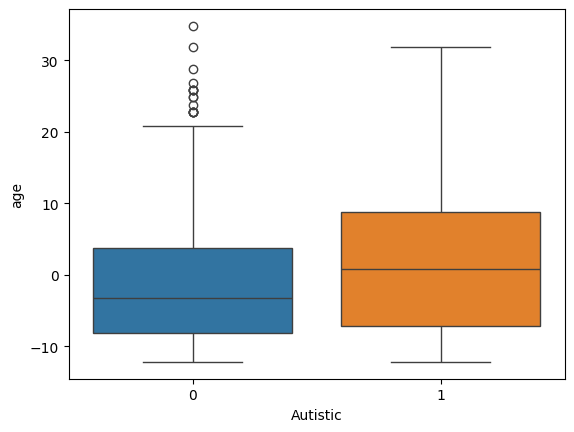

In [ ]:
sns.boxplot(x = df['Autistic'], y = df['age'], hue=df['Autistic'], legend=False)

Inference


*   Median Age of persons having autism is more than who dont have
*   Range for both values of target class is same, thus age cannot be good classifier of target classm below histogram indicates the same

<Axes: xlabel='age', ylabel='Count'>

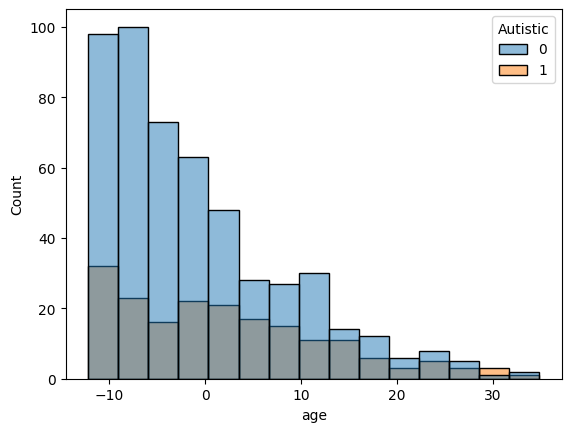

In [ ]:
sns.histplot(x = df['age'], hue = df['Autistic'])

In [ ]:
# Function to conduct chi square test between categorical feature and target feature
def chi_sq_test(ct):
    # input crosstab of 2 categorical variables
    stat, p, dof, expected = chi2_contingency(ct)

    # interpret p-value
    alpha = 0.04000
    print("p value is " + str(p))
    if p <= alpha:
        print('Both variables are Dependent (reject H0)')
    else:
        print('Both variables are Independent (H0 holds true)')

In [ ]:
def cat_col_test(df, cat_colname, target_colname):

    print(f"Column name - {cat_colname}")
    ct = pd.crosstab(df[cat_colname],df[target_colname])
    chi_sq_test(ct)
    ax = ct.plot(kind='bar',stacked=True, rot = 45)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.show()

## Checking dependence of Categorical Variables on Target Autism Variable

In [ ]:
all_columns = df.columns.tolist()
print(all_columns)

column_to_remove = ['age','Autistic']

all_columns.remove('age')
all_columns.remove('Autistic')
categorical_variables = all_columns

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'jundice', 'relative_autism', 'used_app_before', 'Autistic', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'contry_of_res_India', 'contry_of_res_Jordan', 'contry_of_res_New Zealand', 'contry_of_res_Other', 'contry_of_res_United Arab Emirates', 'contry_of_res_United Kingdom', 'contry_of_res_United States', 'relation_Parent', 'relation_Relative', 'relation_Self']


Column name - A1_Score
p value is 6.089427558513987e-15
Both variables are Dependent (reject H0)


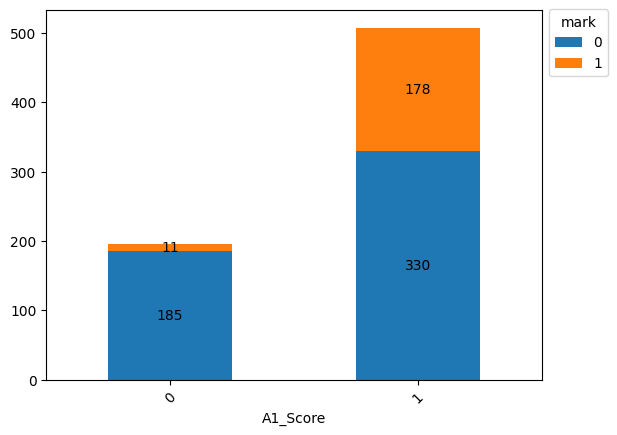


-----------------------------------------------------------------------------------

Column name - A2_Score
p value is 2.9228294555857717e-16
Both variables are Dependent (reject H0)


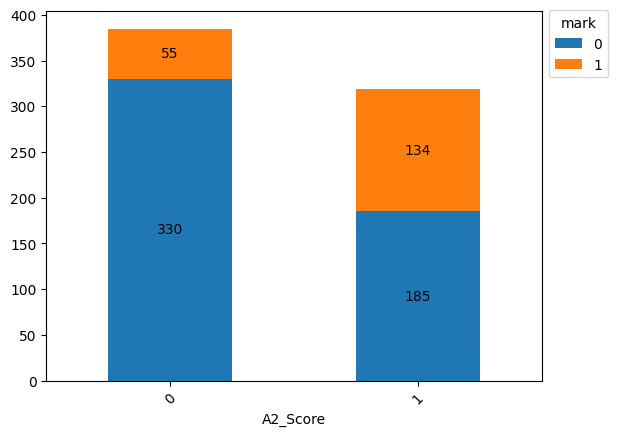


-----------------------------------------------------------------------------------

Column name - A3_Score
p value is 3.3522248685530275e-31
Both variables are Dependent (reject H0)


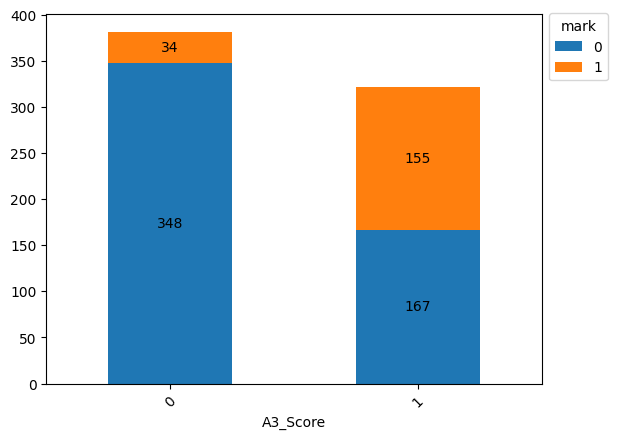


-----------------------------------------------------------------------------------

Column name - A4_Score
p value is 3.1901210363590196e-35
Both variables are Dependent (reject H0)


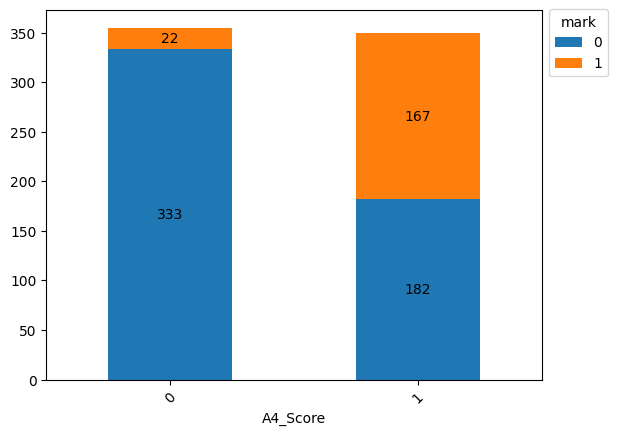


-----------------------------------------------------------------------------------

Column name - A5_Score
p value is 1.5458575800301928e-45
Both variables are Dependent (reject H0)


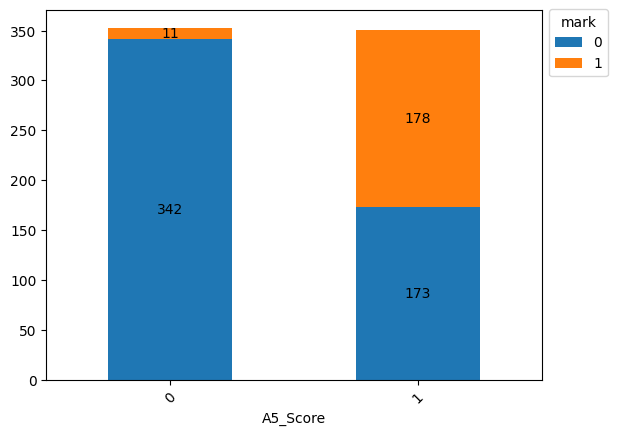


-----------------------------------------------------------------------------------

Column name - A6_Score
p value is 5.6954030872241455e-55
Both variables are Dependent (reject H0)


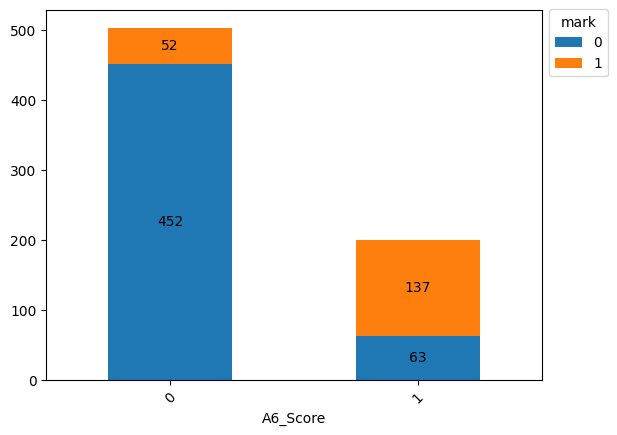


-----------------------------------------------------------------------------------

Column name - A7_Score
p value is 2.50606072500707e-20
Both variables are Dependent (reject H0)


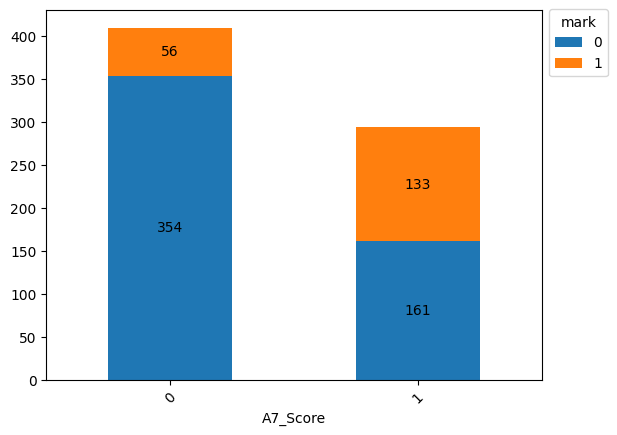


-----------------------------------------------------------------------------------

Column name - A8_Score
p value is 5.522805841679005e-10
Both variables are Dependent (reject H0)


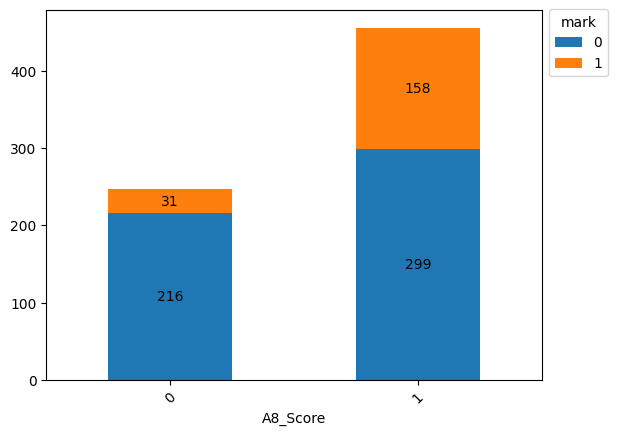


-----------------------------------------------------------------------------------

Column name - A9_Score
p value is 3.854919896502865e-63
Both variables are Dependent (reject H0)


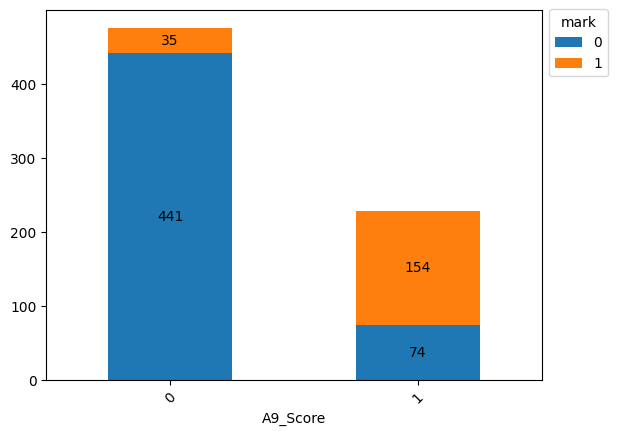


-----------------------------------------------------------------------------------

Column name - A10_Score
p value is 3.1952998214220183e-24
Both variables are Dependent (reject H0)


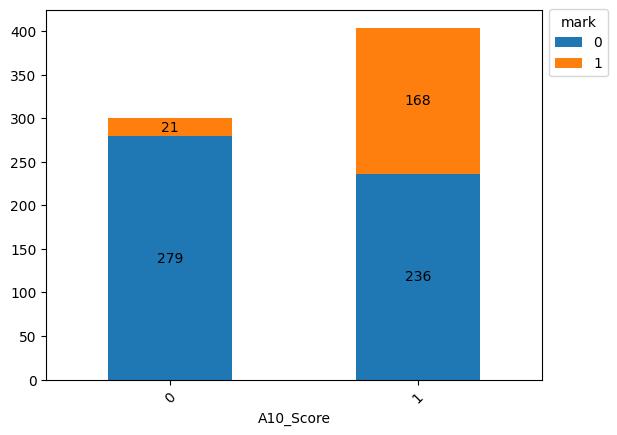


-----------------------------------------------------------------------------------

Column name - gender
p value is 0.040604633334703925
Both variables are Independent (H0 holds true)


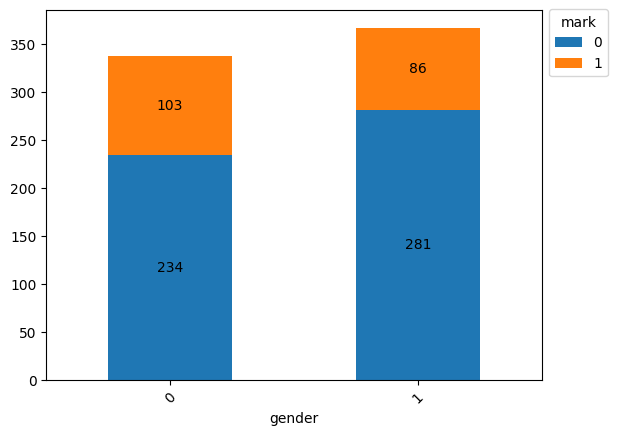


-----------------------------------------------------------------------------------

Column name - jundice
p value is 0.010247268414204275
Both variables are Dependent (reject H0)


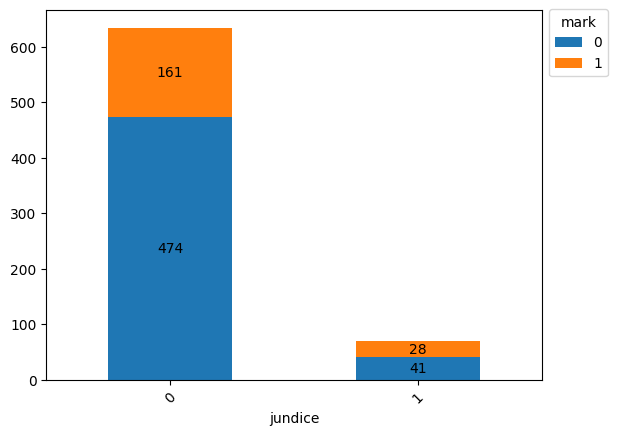


-----------------------------------------------------------------------------------

Column name - relative_autism
p value is 4.63649391560665e-06
Both variables are Dependent (reject H0)


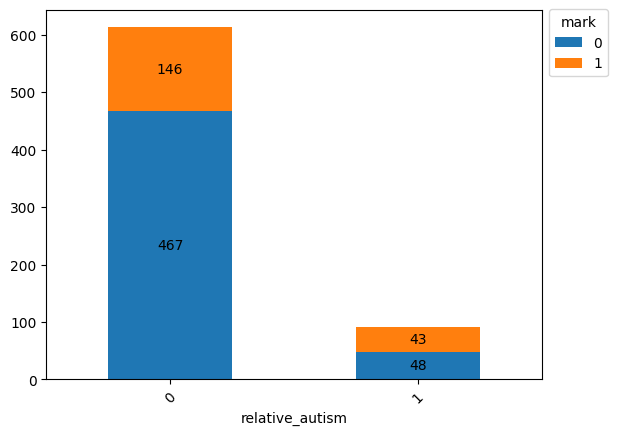


-----------------------------------------------------------------------------------

Column name - used_app_before
p value is 0.4009394387224988
Both variables are Independent (H0 holds true)


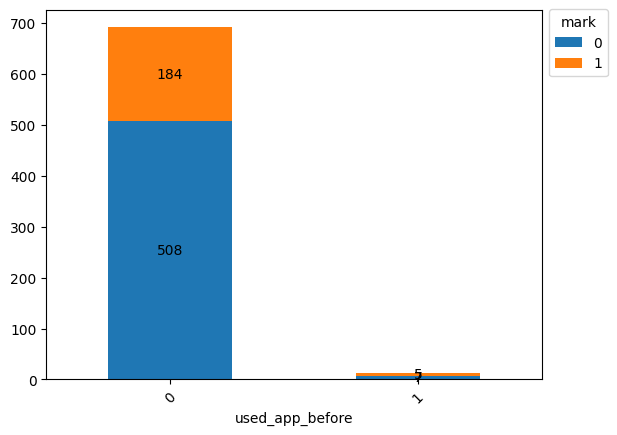


-----------------------------------------------------------------------------------

Column name - ethnicity_Black
p value is 0.03441693822063399
Both variables are Dependent (reject H0)


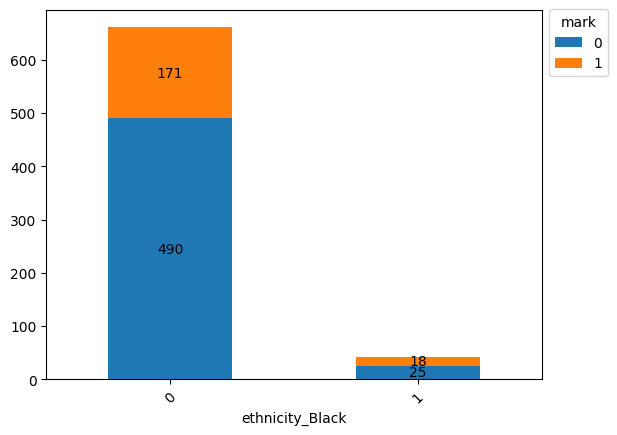


-----------------------------------------------------------------------------------

Column name - ethnicity_Hispanic
p value is 0.5234832092912487
Both variables are Independent (H0 holds true)


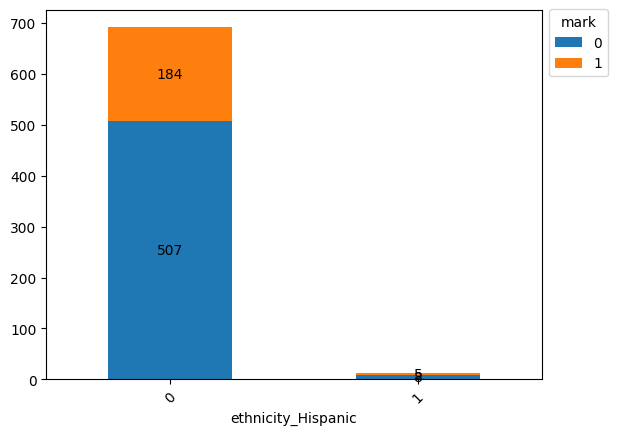


-----------------------------------------------------------------------------------

Column name - ethnicity_Latino
p value is 0.03447446369744519
Both variables are Dependent (reject H0)


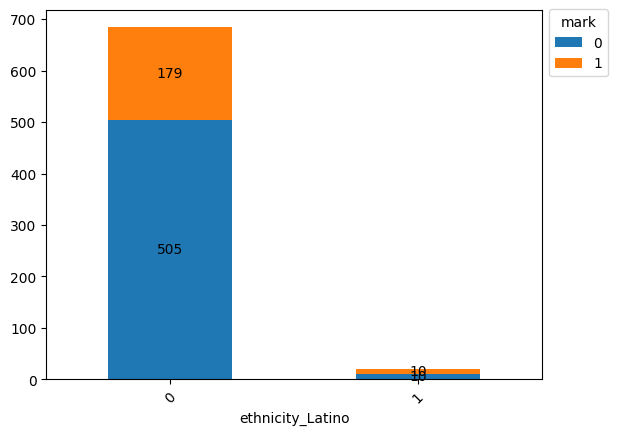


-----------------------------------------------------------------------------------

Column name - ethnicity_Middle Eastern
p value is 4.363716270317193e-05
Both variables are Dependent (reject H0)


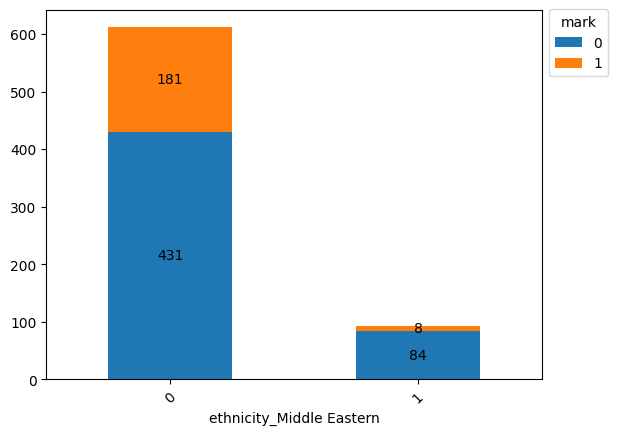


-----------------------------------------------------------------------------------

Column name - ethnicity_Others
p value is 0.0006729879272048756
Both variables are Dependent (reject H0)


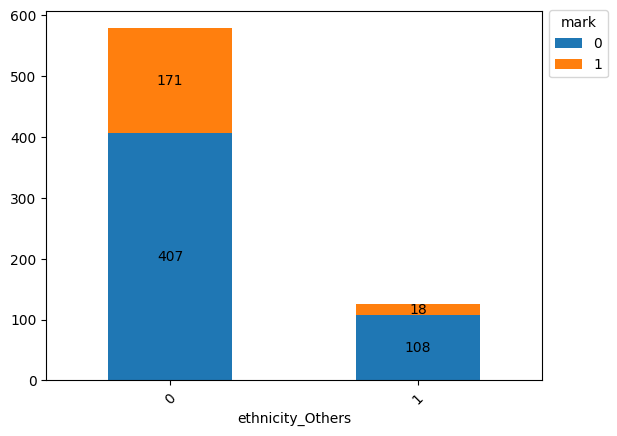


-----------------------------------------------------------------------------------

Column name - ethnicity_Pasifika
p value is 0.2580023064552386
Both variables are Independent (H0 holds true)


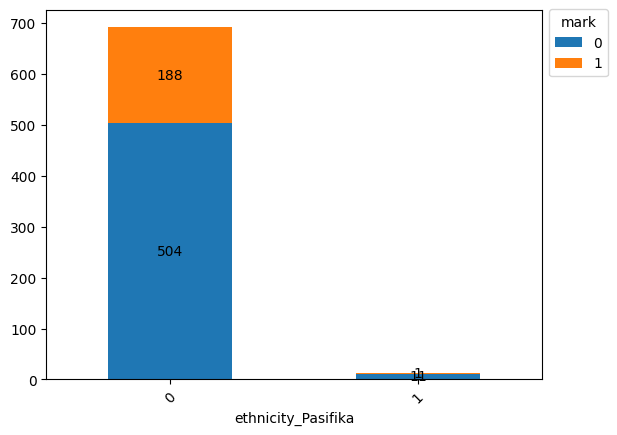


-----------------------------------------------------------------------------------

Column name - ethnicity_South Asian
p value is 0.017306175488387022
Both variables are Dependent (reject H0)


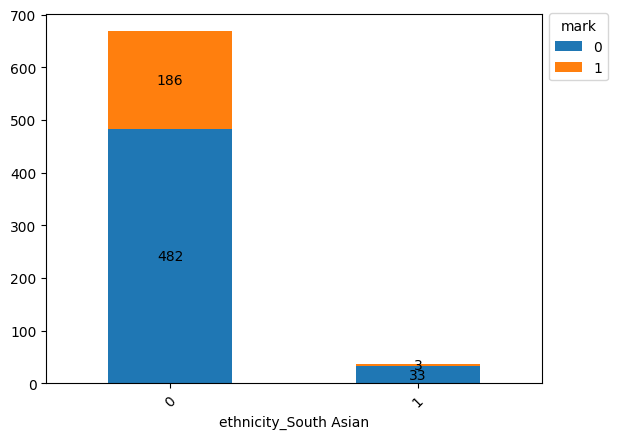


-----------------------------------------------------------------------------------

Column name - ethnicity_Turkish
p value is 0.9183562135336044
Both variables are Independent (H0 holds true)


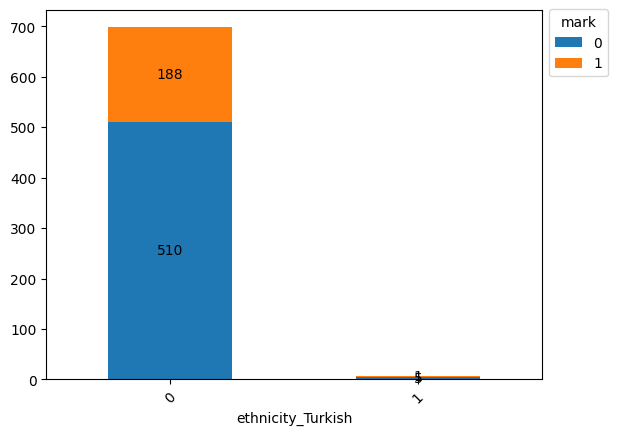


-----------------------------------------------------------------------------------

Column name - ethnicity_White-European
p value is 1.0050059906070844e-16
Both variables are Dependent (reject H0)


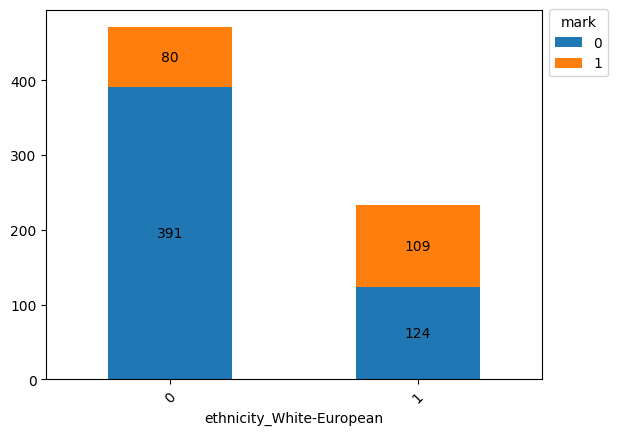


-----------------------------------------------------------------------------------

Column name - contry_of_res_India
p value is 4.836918896923829e-05
Both variables are Dependent (reject H0)


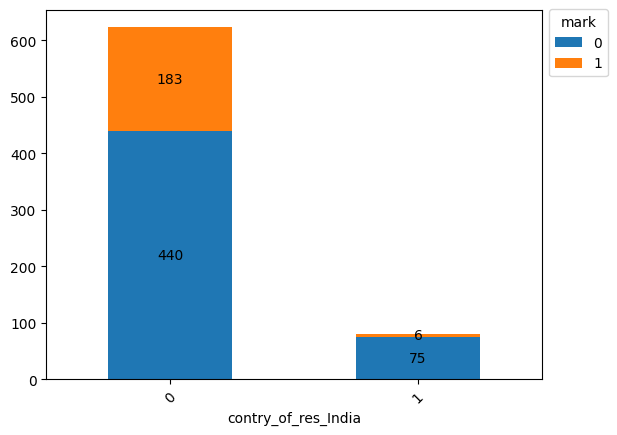


-----------------------------------------------------------------------------------

Column name - contry_of_res_Jordan
p value is 0.0005661518464620866
Both variables are Dependent (reject H0)


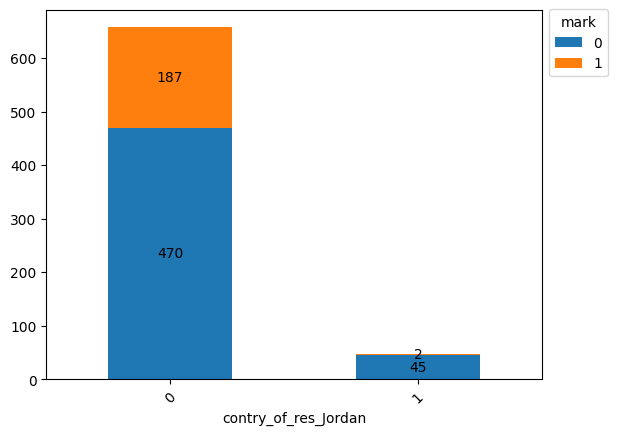


-----------------------------------------------------------------------------------

Column name - contry_of_res_New Zealand
p value is 0.09598351377009118
Both variables are Independent (H0 holds true)


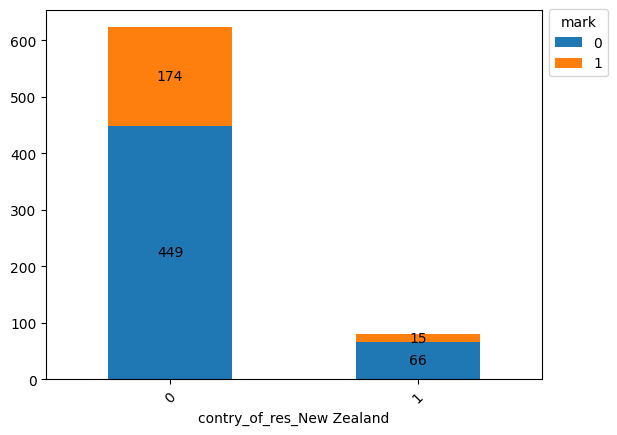


-----------------------------------------------------------------------------------

Column name - contry_of_res_Other
p value is 0.0025847441243148873
Both variables are Dependent (reject H0)


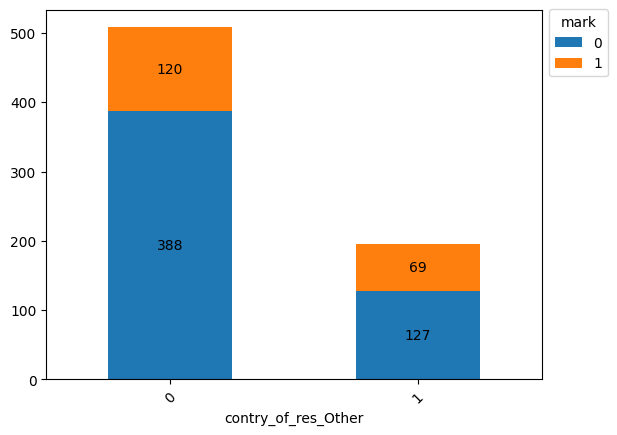


-----------------------------------------------------------------------------------

Column name - contry_of_res_United Arab Emirates
p value is 9.188877455457318e-07
Both variables are Dependent (reject H0)


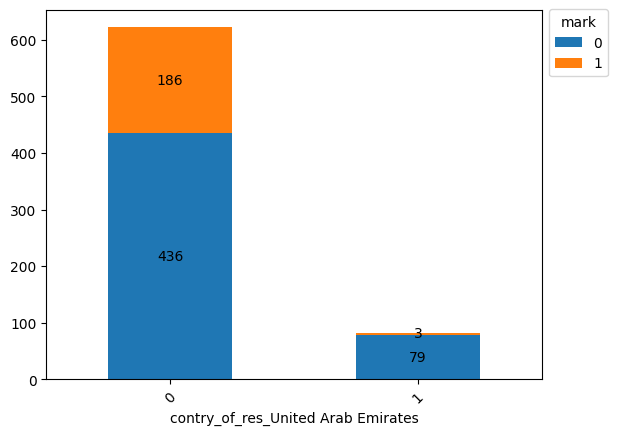


-----------------------------------------------------------------------------------

Column name - contry_of_res_United Kingdom
p value is 0.03291979678318046
Both variables are Dependent (reject H0)


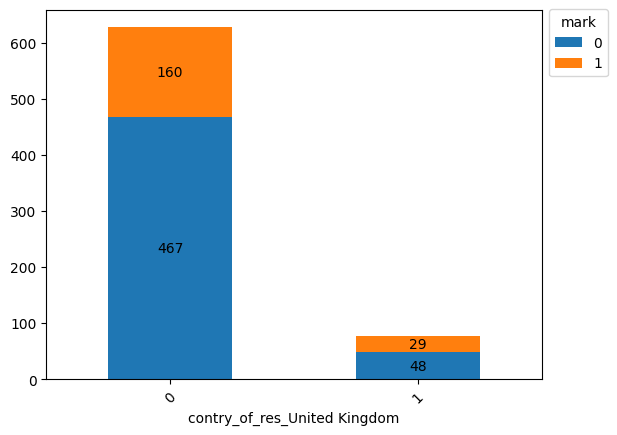


-----------------------------------------------------------------------------------

Column name - contry_of_res_United States
p value is 2.823833825088636e-07
Both variables are Dependent (reject H0)


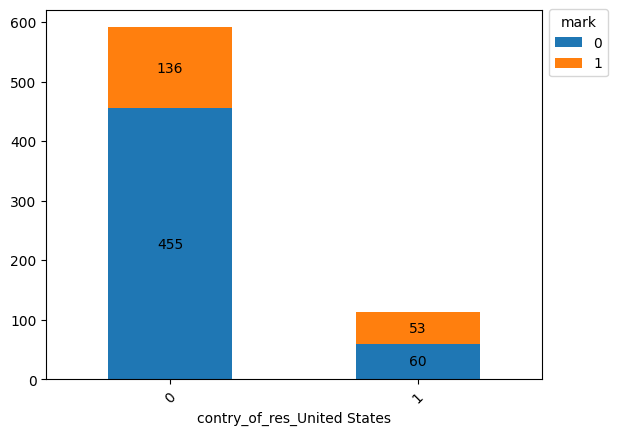


-----------------------------------------------------------------------------------

Column name - relation_Parent
p value is 0.7598352952258614
Both variables are Independent (H0 holds true)


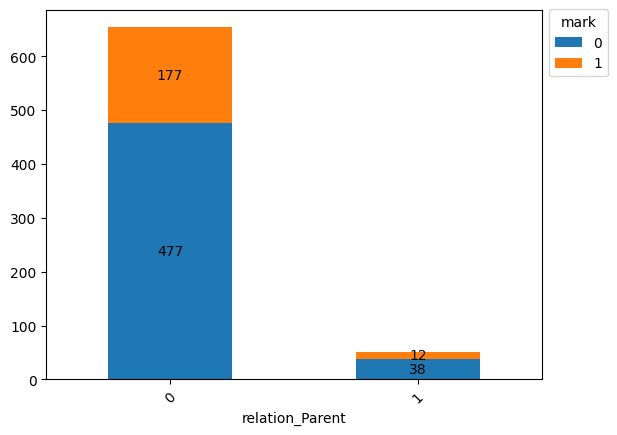


-----------------------------------------------------------------------------------

Column name - relation_Relative
p value is 0.6688220085923527
Both variables are Independent (H0 holds true)


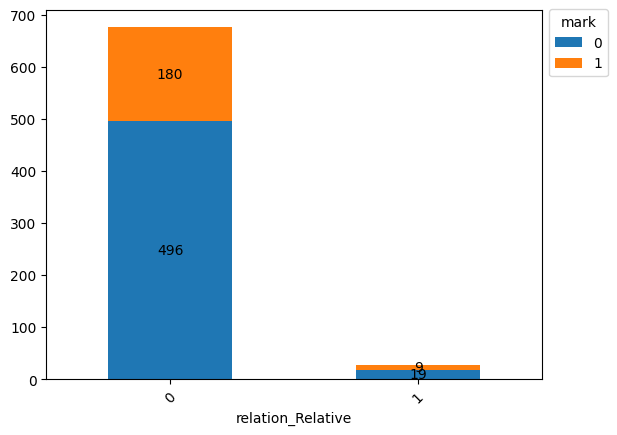


-----------------------------------------------------------------------------------

Column name - relation_Self
p value is 0.0014827959786081772
Both variables are Dependent (reject H0)


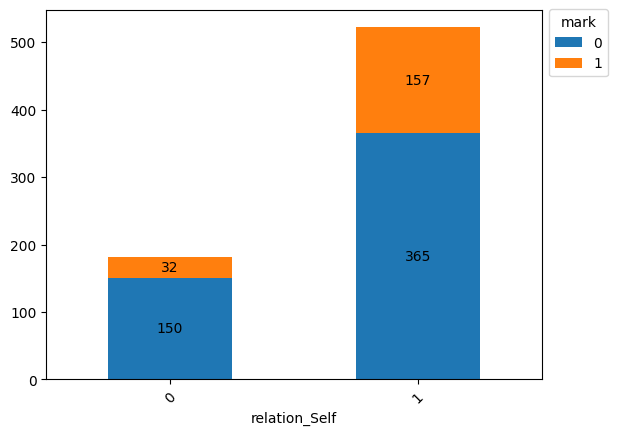


-----------------------------------------------------------------------------------



In [ ]:
for cat_var in categorical_variables:
  cat_col_test(df, cat_var, 'Autistic')
  print("\n-----------------------------------------------------------------------------------\n")

## EDA on Relative_Autism and Jaundice Variables

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Select your independent variables and the dependent variable
X = df[['relative_autism', 'jundice']]  # Independent variables
y = df['Autistic']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the coefficients of the model
print("Model Coefficients (for relative_autism and jundice):")
print(log_reg_model.coef_)

Confusion Matrix:
[[153   2]
 [ 53   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       155
           1       0.67      0.07      0.13        57

    accuracy                           0.74       212
   macro avg       0.70      0.53      0.49       212
weighted avg       0.72      0.74      0.65       212

Model Coefficients (for relative_autism and jundice):
[[0.83762253 0.49540889]]


Coefficients:

The coefficients for relative_autism and jundice are 0.8376 and 0.4954, respectively. These coefficients indicate how changes in the predictor variables are associated with changes in the log odds of being autistic. Specifically, having a relative with autism (relative_autism = 1) is associated with an increase in the log odds of being autistic, as indicated by the positive coefficient. Similarly, having jaundice (jundice = 1) is also associated with an increase in the log odds of being autistic, but its impact is smaller compared to relative autism based on the coefficient values.
These results suggest that both having a relative with autism and having jaundice are associated with being autistic, with relative autism having a stronger association based on the model coefficients. However, the low recall for autistic cases suggests that the model's ability to predict autistic cases based solely on these two variables is limited.

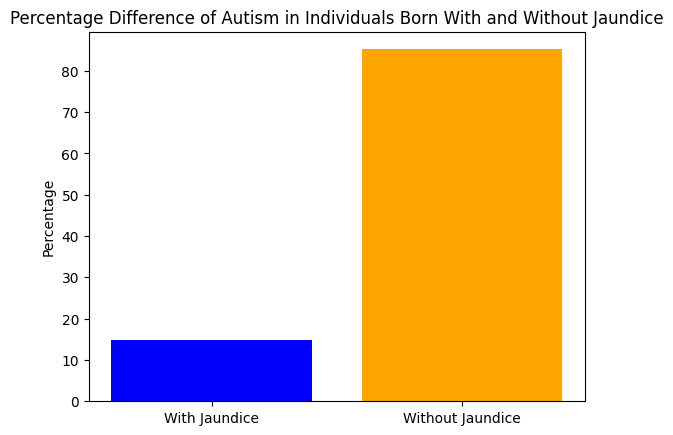

In [ ]:
autistic_df = df[df['Autistic'] == 1]
percentage_with_jaundice = (autistic_df['jundice'].value_counts(normalize=True) * 100).get(1, 0)
percentage_without_jaundice = (autistic_df['jundice'].value_counts(normalize=True) * 100).get(0, 0)
import matplotlib.pyplot as plt

labels = ['With Jaundice', 'Without Jaundice']
percentages = [percentage_with_jaundice, percentage_without_jaundice]

plt.bar(labels, percentages, color=['blue', 'orange'])
plt.ylabel('Percentage')
plt.title('Percentage Difference of Autism in Individuals Born With and Without Jaundice')
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['relative_autism'], df['Autistic'])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant association between the two variables.")
else:
    print("There is no significant association between the two variables.")

Chi-square Statistic: 20.981873499582953
P-value: 4.63649391560665e-06
There is a significant association between the two variables.


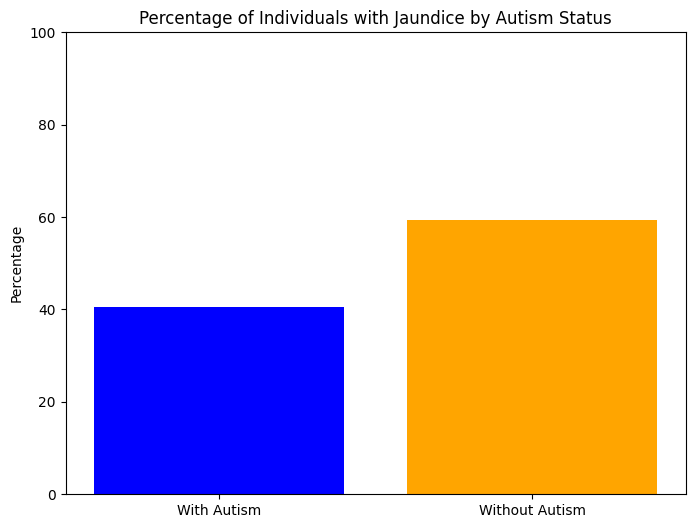

In [ ]:
# Filter the DataFrame for individuals with jaundice
jaundice_df = df[df['jundice'] == 1]

# Calculate the percentage of individuals with and without autism within the jaundice group
percentage_with_autism = jaundice_df['Autistic'].mean() * 100
percentage_without_autism = 100 - percentage_with_autism

# Data to plot
percentages = [percentage_with_autism, percentage_without_autism]
labels = ['With Autism', 'Without Autism']
colors = ['blue', 'orange']

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Percentage of Individuals with Jaundice by Autism Status')
plt.ylim(0, 100)  # Set the y-axis to show percentages from 0 to 100 for clarity

# Display the plot
plt.show()

(0.0, 100.0)

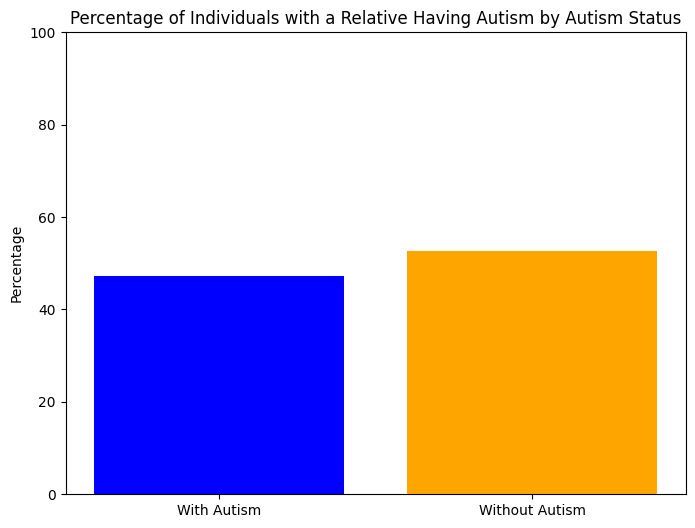

In [ ]:
# Filter the DataFrame for individuals with a relative having autism
relative_autism_df = df[df['relative_autism'] == 1]

# Calculate the percentage of individuals with and without autism within the relative_autism group
percentage_with_autism = (relative_autism_df['Autistic'].value_counts(normalize=True) * 100).get(1, 0)
percentage_without_autism = (relative_autism_df['Autistic'].value_counts(normalize=True) * 100).get(0, 0)

# Data to plot
percentages = [percentage_with_autism, percentage_without_autism]
labels = ['With Autism', 'Without Autism']
colors = ['blue', 'orange']

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Percentage of Individuals with a Relative Having Autism by Autism Status')
plt.ylim(0, 100)  #

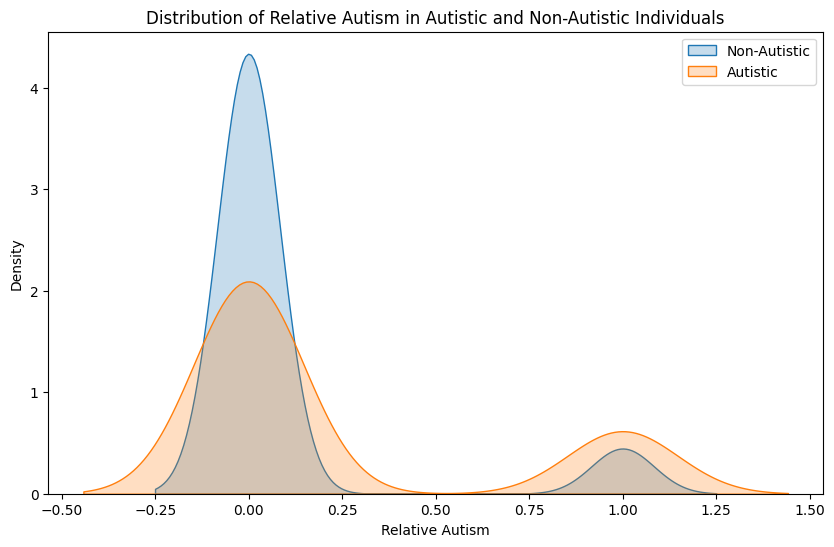

In [ ]:
# Importing seaborn for the distribution line chart
import seaborn as sns

# Plotting a distribution line chart for 'relative_autism' for autistic and non-autistic individuals
plt.figure(figsize=(10, 6))

# We need to normalize the counts to compare the distributions accurately
sns.kdeplot(df[df['Autistic'] == 0]['relative_autism'], label='Non-Autistic', shade=True)
sns.kdeplot(df[df['Autistic'] == 1]['relative_autism'], label='Autistic', shade=True)

plt.title('Distribution of Relative Autism in Autistic and Non-Autistic Individuals')
plt.xlabel('Relative Autism')
plt.ylabel('Density')
plt.legend()
plt.show()


### **Inference**

**used_app_before, gender** are independent from target variable, in chisquare test. Hence, dropping these variable for model building stage.

**ethnicity_Pasifika, ethnicity_Hispanic, ethnicity_Turkish, contry_of_res_New Zealand, relation_Parent, relation_Relative** are independent from the target variable in chisquare test. Hence, putting these variables in Others category.

In [ ]:
df.loc[df['ethnicity_Pasifika'] == 1, 'ethnicity_Others'] += 1
df.loc[df['ethnicity_Turkish'] == 1, 'ethnicity_Others'] += 1
df.loc[df['ethnicity_Hispanic'] == 1, 'ethnicity_Others'] += 1
df.drop(['ethnicity_Pasifika','ethnicity_Turkish', 'ethnicity_Hispanic'],axis=1, inplace=True)

df.loc[df['contry_of_res_New Zealand'] == 1, 'contry_of_res_Other'] += 1
df.drop(['contry_of_res_New Zealand'],axis=1, inplace=True)

In [ ]:
df.drop(['used_app_before','gender'],axis=1,inplace=True)

# Model building - finding best algorithm


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains the target variable
X = df.drop(columns=['Autistic'])
y = df['Autistic']

# Split the data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## CART

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer

# Next, we define a set of functions to compute the metrics of the model

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity or Recall
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, average_precision_score
import pandas as pd
import plotly.express as px
# Define a range of values for max_leaf_nodes
n_max_leaf_nodes = range(2, 15)

# Initialize lists to store AUC scores
train_auc_scores = []
test_auc_scores = []

# Train Decision Tree classifiers with different max_leaf_nodes values
for n in n_max_leaf_nodes:
    # Initialize DecisionTreeClassifier
    classifier_DT = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=n, random_state=42)

    # Train the classifier on the training data
    classifier_DT.fit(X_train, y_train)

   # Make predictions on the training data
    y_train_pred_prob = classifier_DT.predict_proba(X_train)[:, 1]  # Use probabilities for the positive class

    # Make predictions on the testing data
    y_test_pred_prob = classifier_DT.predict_proba(X_test)[:, 1]  # Use pro

    # Calculate AUC scores for training and testing data
    # train_auc = average_precision_score(y_train, y_train_pred_prob)
    # test_auc = average_precision_score(y_test, y_test_pred_prob)

    precision, recall, thresholds = precision_recall_curve(y_train, y_train_pred_prob)
    train_auc = auc(recall, precision)

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob)
    test_auc = auc(recall, precision)

    # Append AUC scores to the respective lists
    train_auc_scores.append(train_auc)
    test_auc_scores.append(test_auc)

# Create a DataFrame to store AUC scores for visualization
auc_scores_df = pd.DataFrame({'Max Leaf Nodes': n_max_leaf_nodes,
                              'Train AUC': train_auc_scores,
                              'Test AUC': test_auc_scores})

# Plot AUC scores for training and testing data
fig = px.line(auc_scores_df, x='Max Leaf Nodes', y=['Train AUC', 'Test AUC'],
              title='AUC vs Max Leaf Nodes',
              labels={'value': 'AUC', 'variable': 'Dataset'})
fig.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define a Decision Tree model and call it classifier_DT
#classifier_DT = DecisionTreeClassifier(random_state=42) # random_state -- is same as random seed, neede to get the same result every time we rerun
classifier_DT = DecisionTreeClassifier(max_leaf_nodes=12, random_state=42)

# Train the model classifier_DT on the training data
classifier_DT.fit(X_train, y_train)
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1] # probabilities

## In case of Imbalanced dataset where we have a large no of observations with negative values, i.e "Non-Autistic", it is beneficial to look at Precision-Recall curve, since Precision does not take into account the True Negatives, and hence is unaffected by the imbalance.

## Our goal is to priotize Recall (or Sensitivity), while balancing high precision.

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

fig_pr = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(recall, precision):.4f}) for CART Model',
    labels={'x':'Recall', 'y':'Precision'}
)
fig_pr.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig_pr.show()

In [ ]:
print(precision)
print(recall)
print(thresholds)

[0.26704545 0.2748538  0.56521739 0.7037037  0.75       0.77272727
 0.84615385 0.86842105 0.88888889 0.92592593 1.        ]
[1.         1.         0.82978723 0.80851064 0.76595745 0.72340426
 0.70212766 0.70212766 0.68085106 0.53191489 0.        ]
[0.         0.02258065 0.11111111 0.2        0.28571429 0.30769231
 0.75       0.84615385 0.86666667 0.97777778]


In [ ]:
# Find the threshold corresponding to the desired point
chosen_threshold = 0.30769231

print("Chosen Threshold:", chosen_threshold)

y_pred = np.where(y_pred_prob > chosen_threshold, 1, 0) # classification

Chosen Threshold: 0.30769231


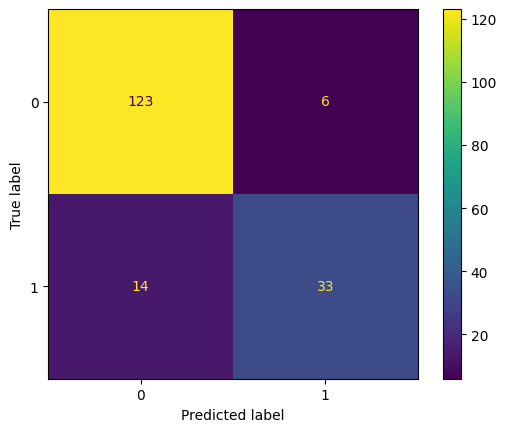

                                   Accuracy:  0.886
                   SENSITIVITY (aka RECALL):  0.702
                 SPECIFICITY (aka FALL-OUT):  0.953
  PRECISION (aka POSITIVE PREDICTIVE VALUE):  0.846
                 NEGATIVE PREDICTIVE VALUE):  0.898


In [ ]:
# Let's look at the model metrics
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classifier_DT.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier_DT.classes_)
disp.plot()
plt.show()

# print('Metrics of the CART model: \n')

print(f"                                   Accuracy:  {custom_accuracy_score(y_test, y_pred):.3f}")
print(f"                   SENSITIVITY (aka RECALL):  {custom_sensitivity_score(y_test, y_pred):.3f}")
print(f"                 SPECIFICITY (aka FALL-OUT):  {custom_specificity_score(y_test, y_pred):.3f}")
print(f"  PRECISION (aka POSITIVE PREDICTIVE VALUE):  {custom_ppv_score(y_test, y_pred):.3f}")
print(f"                 NEGATIVE PREDICTIVE VALUE):  {custom_npv_score(y_test, y_pred):.3f}")

CART tree


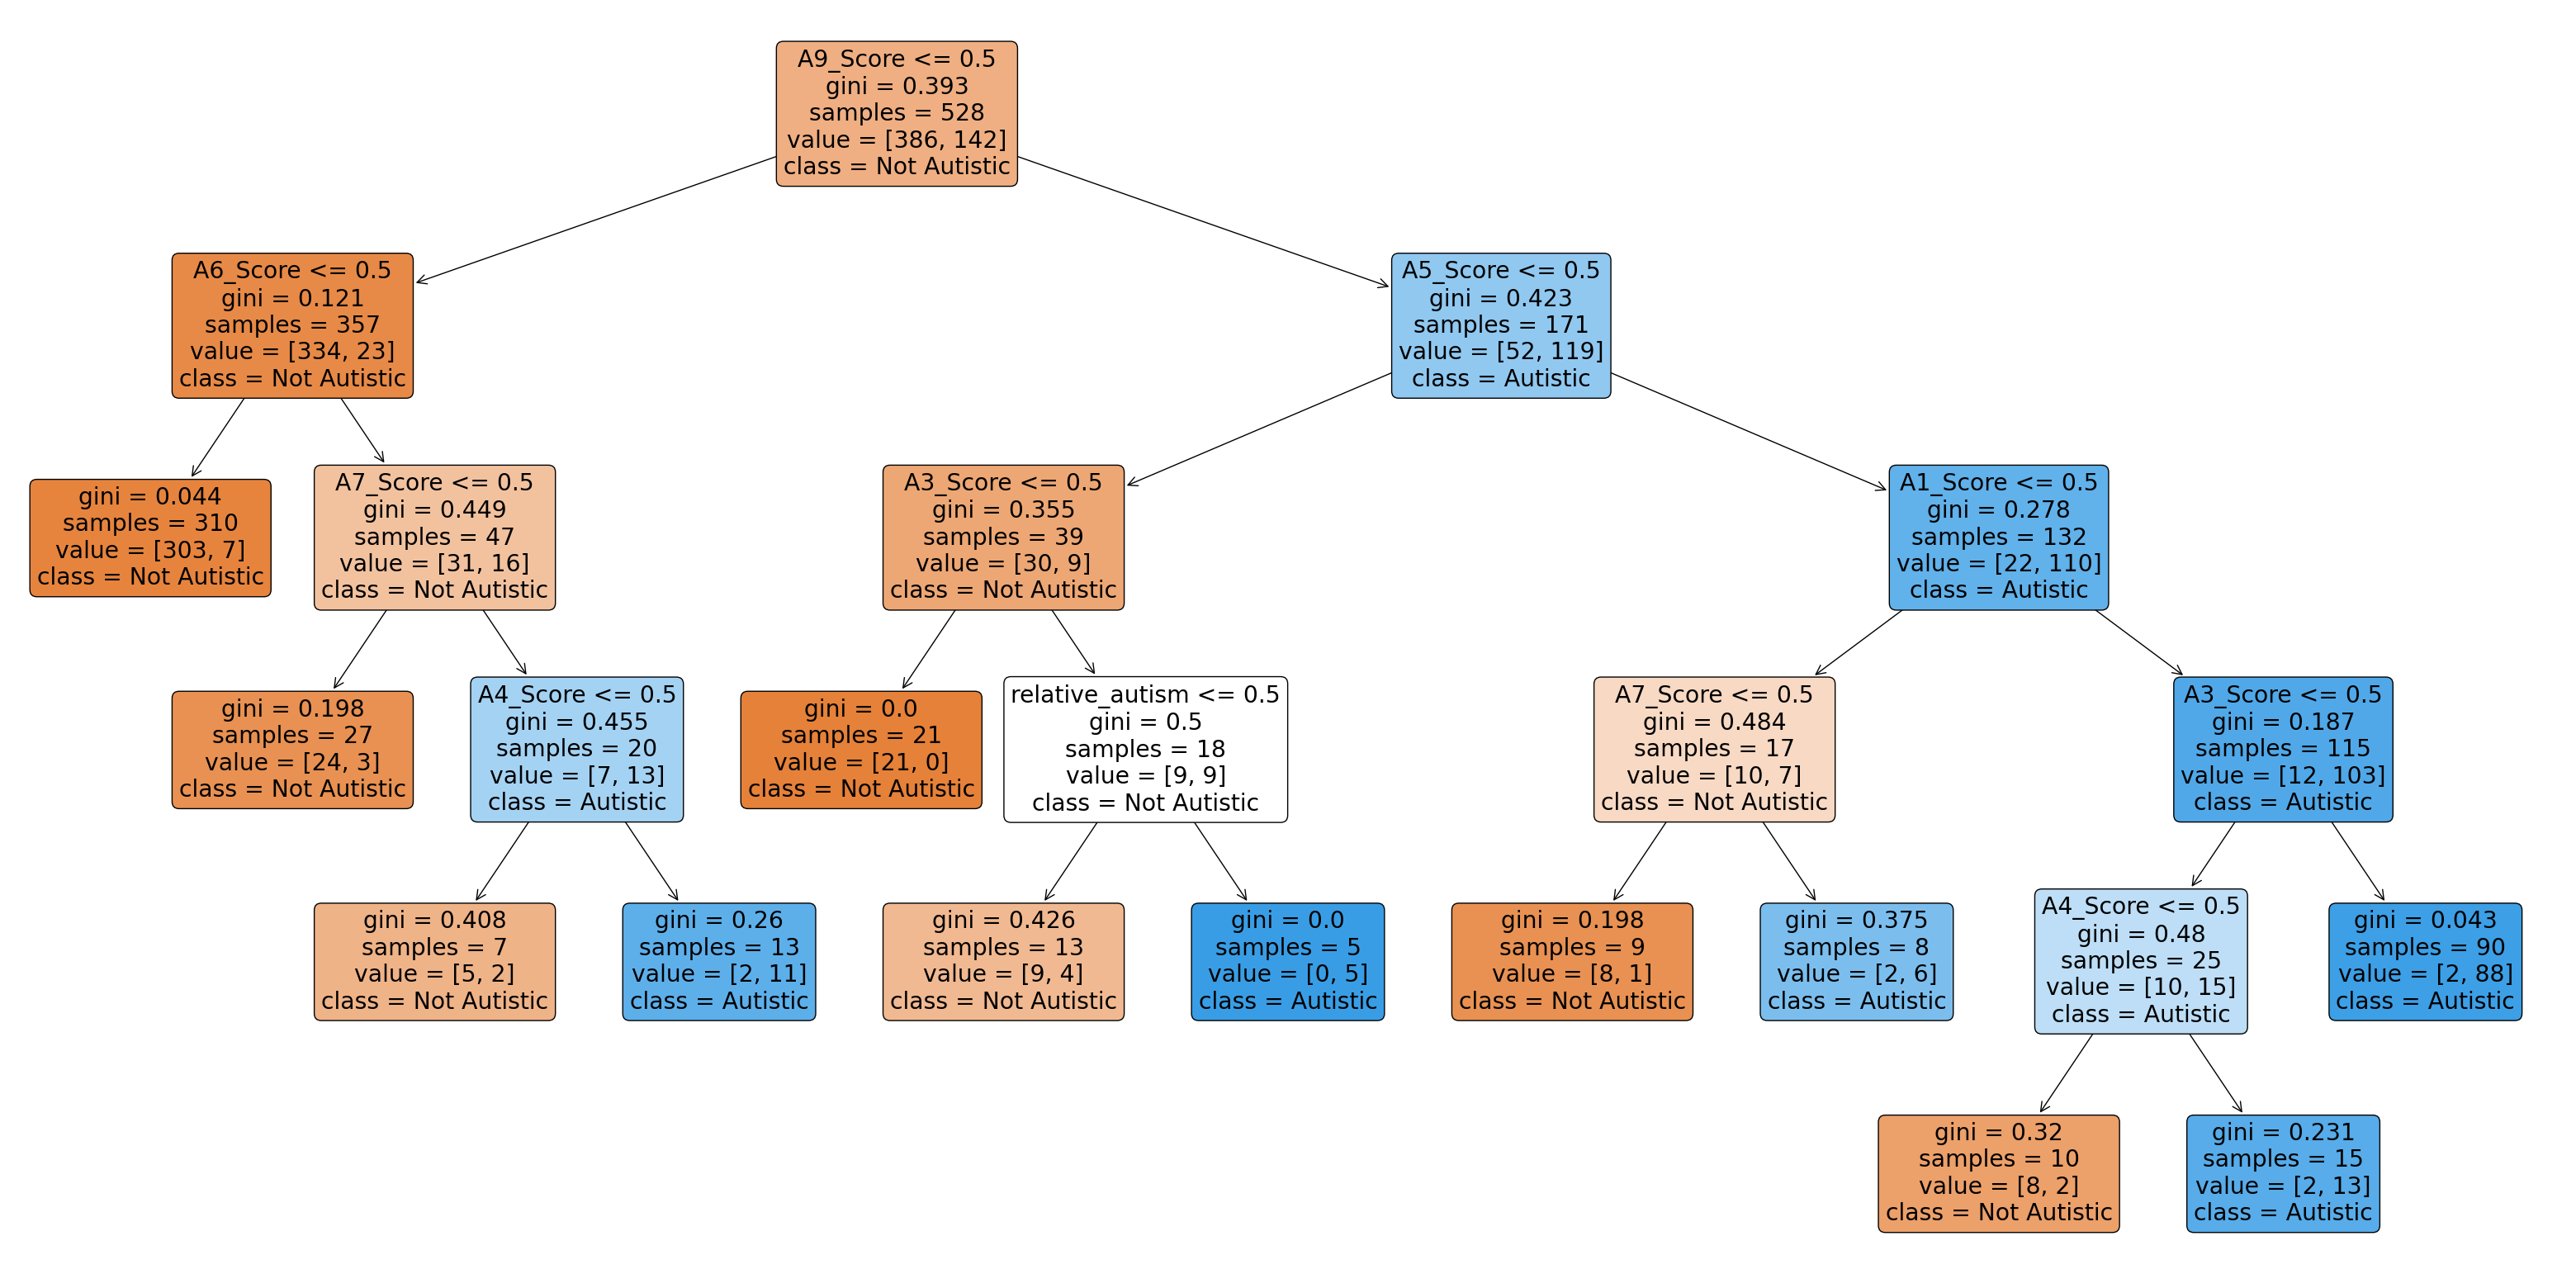

In [ ]:
# Visualizing the resultant tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(40,20))
tree.plot_tree(classifier_DT.fit(X_train, y_train), feature_names = X_train.columns, filled = True,
               class_names = [ 'Not Autistic', 'Autistic'], rounded = True)
print('CART tree')


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# define the model and call it classifier_LR
classifier_LR = LogisticRegression()

# train classifier_LR on the training data
classifier_LR.fit(X_train, y_train)

# coefficients = classifier_LR.params
# p_values = classifier_LR.pvalues

# Create the summary DataFrame
# summary = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': coefficients, 'P-value': p_values})
# summary = summary.sort_values(by='Coefficient', ascending=False)

summary = pd.DataFrame([X_test.columns,classifier_LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']

# print('Highest Coefficients:')
print(summary.head(28))

#Q: Should we worry about lowest coefficients?
# print('Lowest Coefficients:')
# print(summary.tail(10))


                              Variable Coefficient
8                             A9_Score    2.434209
4                             A5_Score    2.107205
5                             A6_Score    2.066951
6                             A7_Score    2.021794
3                             A4_Score    1.970274
0                             A1_Score    1.938328
9                            A10_Score    1.806594
2                             A3_Score    1.779005
7                             A8_Score     1.73359
1                             A2_Score    1.492332
18            ethnicity_White-European    0.685707
16                    ethnicity_Others    0.424538
21                 contry_of_res_Other    0.401889
13                     ethnicity_Black    0.350574
12                     relative_autism    0.325547
24         contry_of_res_United States    0.308736
11                             jundice    0.251837
27                       relation_Self    0.192002
22  contry_of_res_United Arab E

In [ ]:
y_pred_prob = classifier_LR.predict_proba(X_test)[:,1] # probabilities
print(X_test.head(5))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

fig_pr = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(recall, precision):.4f}) for Logistic Regression Model',
    labels={'x':'Recall', 'y':'Precision'}
)
fig_pr.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig_pr.show()

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
58          1         0         0         0         1         0         0   
243         0         0         1         0         1         1         0   
679         1         1         1         1         1         1         1   
639         1         0         0         0         1         1         1   
151         0         1         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  ...  ethnicity_White-European  \
58          1         0          0  ...                         0   
243         0         1          1  ...                         0   
679         1         1          1  ...                         1   
639         1         1          1  ...                         0   
151         1         0          1  ...                         0   

     contry_of_res_India  contry_of_res_Jordan  contry_of_res_Other  \
58                     0                     0     

In [ ]:
# print(len(precision))
# print(len(recall))
# print(len(thresholds))

In [ ]:
# Select the threshold value -- use optimal threshold
class_threshold = 0.3436825842095349

y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # applying the threshold rule to classify

#combine outputs into one dataframe for easier output
dataset = pd.DataFrame({'probabilities': list(y_pred_prob), 'prediction': list(y_pred), 'Autistic?': list(y_test)})
print(dataset)


     probabilities  prediction  Autistic?
0         0.001016           0          0
1         0.086264           0          0
2         0.999364           1          1
3         0.772616           1          1
4         0.489489           1          1
..             ...         ...        ...
171       0.000070           0          0
172       0.000108           0          0
173       0.005897           0          0
174       0.769897           1          1
175       0.986251           1          1

[176 rows x 3 columns]


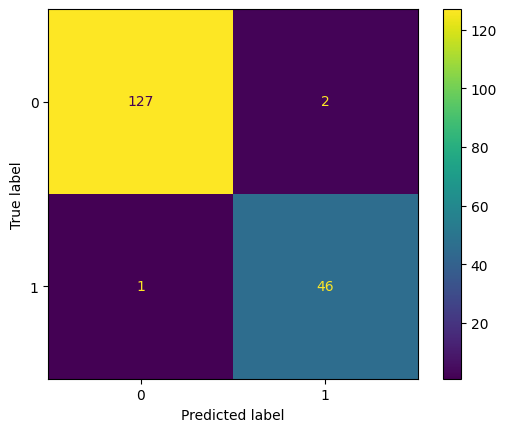

                                   Accuracy:  0.983
                   SENSITIVITY (aka RECALL):  0.979
                 SPECIFICITY (aka FALL-OUT):  0.984
  PRECISION (aka POSITIVE PREDICTIVE VALUE):  0.958
                 NEGATIVE PREDICTIVE VALUE):  0.992


In [ ]:
# Let's look at the model metrics
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classifier_DT.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier_DT.classes_)
disp.plot()
plt.show()

# print('Metrics of the Logit Model model: \n')

print(f"                                   Accuracy:  {custom_accuracy_score(y_test, y_pred):.3f}")
print(f"                   SENSITIVITY (aka RECALL):  {custom_sensitivity_score(y_test, y_pred):.3f}")
print(f"                 SPECIFICITY (aka FALL-OUT):  {custom_specificity_score(y_test, y_pred):.3f}")
print(f"  PRECISION (aka POSITIVE PREDICTIVE VALUE):  {custom_ppv_score(y_test, y_pred):.3f}")
print(f"                 NEGATIVE PREDICTIVE VALUE):  {custom_npv_score(y_test, y_pred):.3f}")